# K-Means Clustering: Iris Flowers

## 1. Load and Explore Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from ucimlrepo import fetch_ucirepo

iris = fetch_ucirepo(id=53)
iris

{'data': {'ids': None,
  'features':      sepal length  sepal width  petal length  petal width
  0             5.1          3.5           1.4          0.2
  1             4.9          3.0           1.4          0.2
  2             4.7          3.2           1.3          0.2
  3             4.6          3.1           1.5          0.2
  4             5.0          3.6           1.4          0.2
  ..            ...          ...           ...          ...
  145           6.7          3.0           5.2          2.3
  146           6.3          2.5           5.0          1.9
  147           6.5          3.0           5.2          2.0
  148           6.2          3.4           5.4          2.3
  149           5.9          3.0           5.1          1.8
  
  [150 rows x 4 columns],
  'targets':               class
  0       Iris-setosa
  1       Iris-setosa
  2       Iris-setosa
  3       Iris-setosa
  4       Iris-setosa
  ..              ...
  145  Iris-virginica
  146  Iris-virginica
  147  

In [3]:
X = iris.data.features
y = iris.data.targets
X, y

(     sepal length  sepal width  petal length  petal width
 0             5.1          3.5           1.4          0.2
 1             4.9          3.0           1.4          0.2
 2             4.7          3.2           1.3          0.2
 3             4.6          3.1           1.5          0.2
 4             5.0          3.6           1.4          0.2
 ..            ...          ...           ...          ...
 145           6.7          3.0           5.2          2.3
 146           6.3          2.5           5.0          1.9
 147           6.5          3.0           5.2          2.0
 148           6.2          3.4           5.4          2.3
 149           5.9          3.0           5.1          1.8
 
 [150 rows x 4 columns],
               class
 0       Iris-setosa
 1       Iris-setosa
 2       Iris-setosa
 3       Iris-setosa
 4       Iris-setosa
 ..              ...
 145  Iris-virginica
 146  Iris-virginica
 147  Iris-virginica
 148  Iris-virginica
 149  Iris-virginica
 
 [150 rows 

In [4]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal length  150 non-null    float64
 1   sepal width   150 non-null    float64
 2   petal length  150 non-null    float64
 3   petal width   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [5]:
X.describe()

,sepal length,sepal width,petal length,petal width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


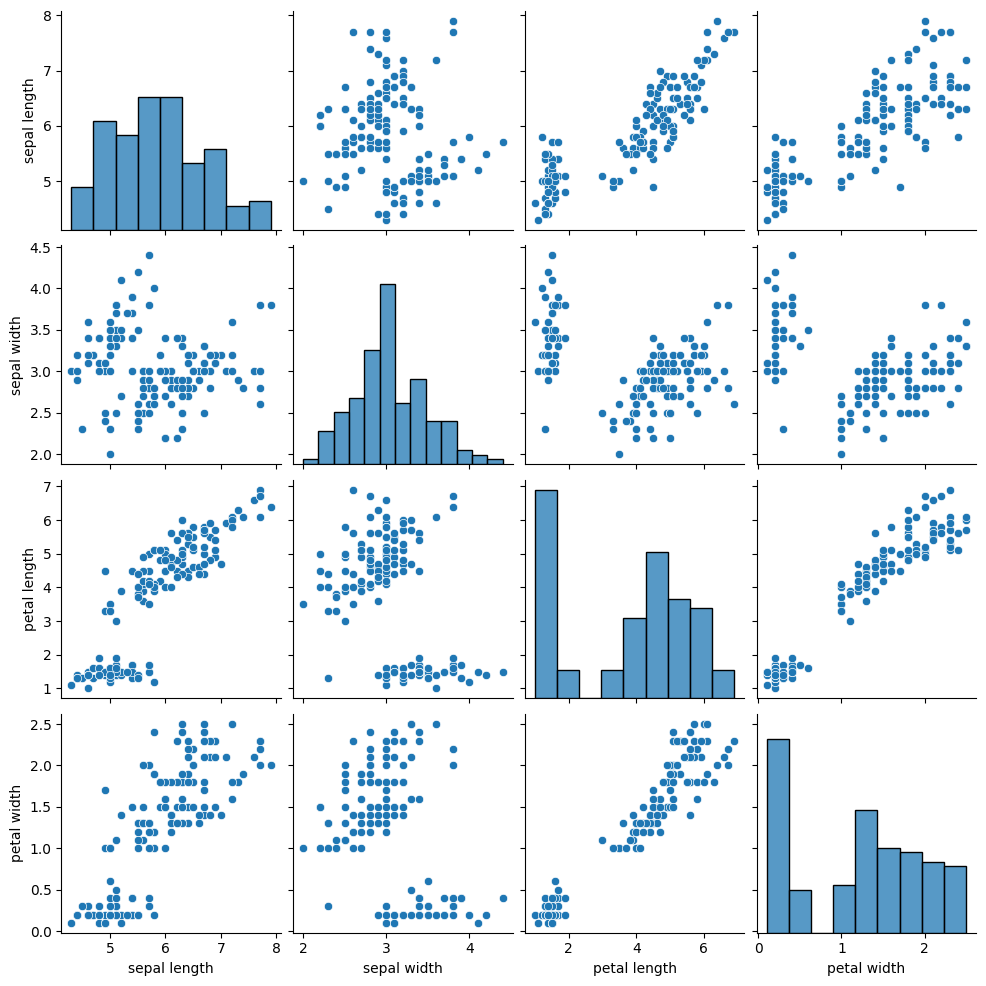

In [6]:
# Visualize dataset using pair plots
sns.pairplot(X)

## 2. Data Preprocessing

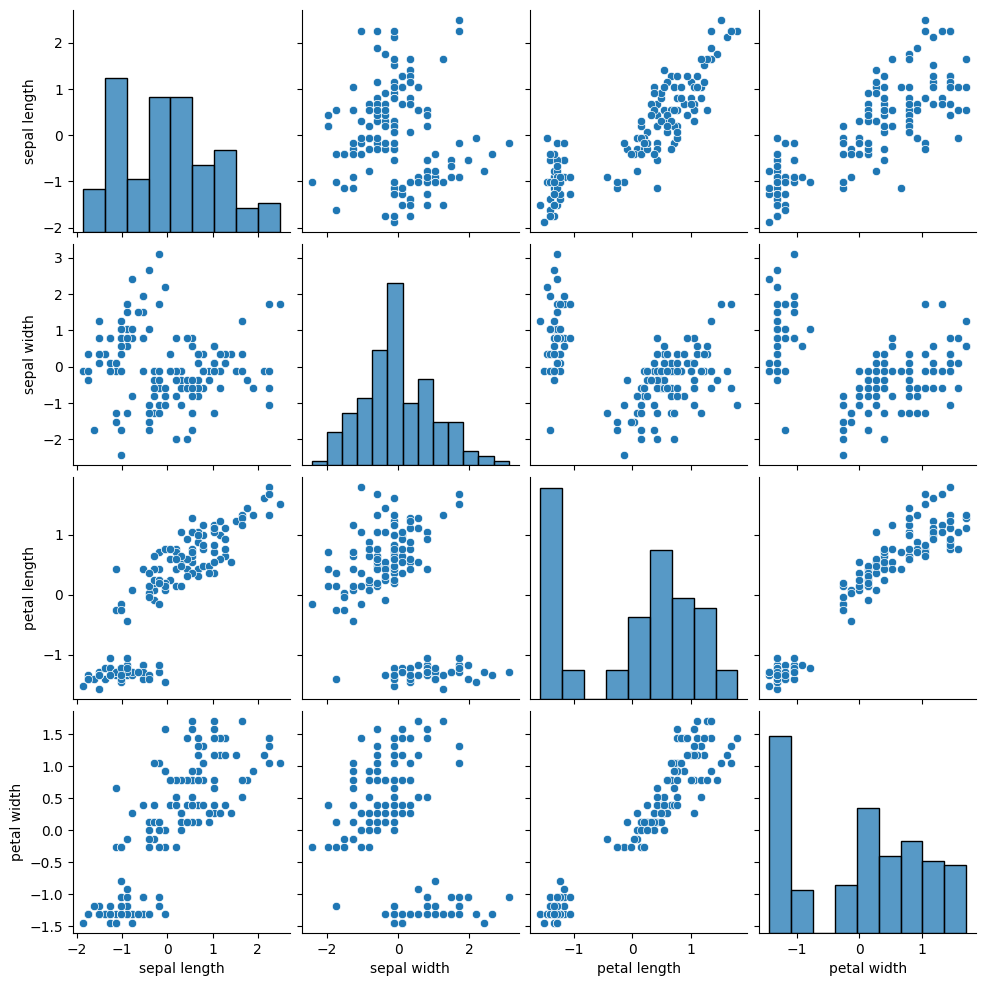

In [7]:
# Apply StandardScaler and visualized the scaled features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)
sns.pairplot(X_scaled)

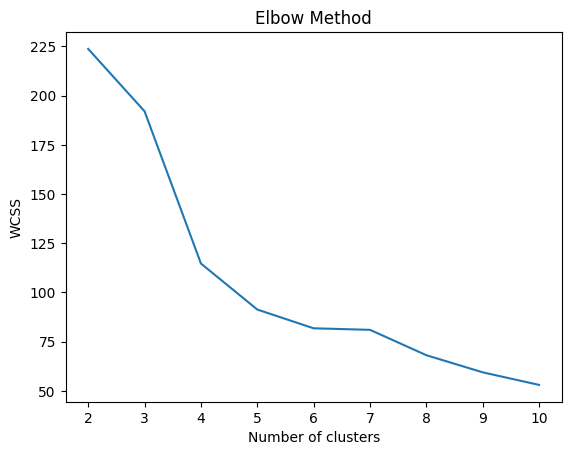

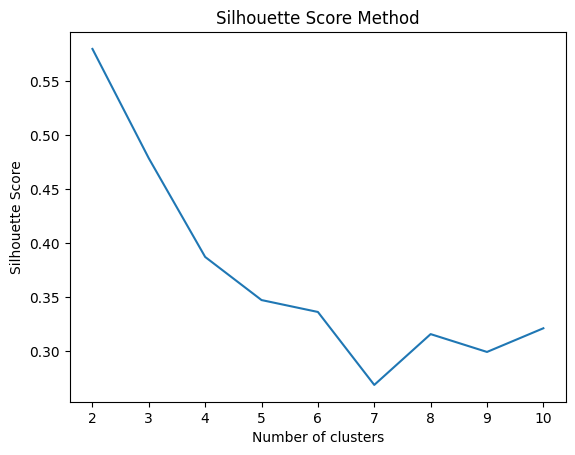

In [10]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

wcss=[]
silhoutte_scores=[]

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)
    silhoutte_scores.append(silhouette_score(X_scaled, kmeans.labels_))

plt.plot(range(2, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

plt.plot(range(2, 11), silhoutte_scores)
plt.title('Silhouette Score Method')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.show()

In [17]:
optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
cluster_labels = kmeans.fit_predict(X_scaled)
X['cluster'] = cluster_labels

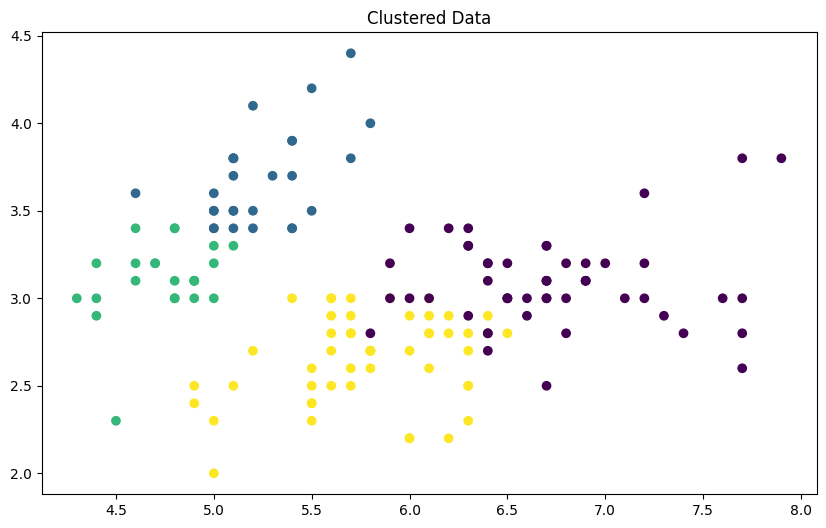

In [18]:
plt.figure(figsize=(10, 6))
plt.scatter(X['sepal length'], X['sepal width'], c=X['cluster'], cmap='viridis')
plt.title('Clustered Data')
plt.show()